In [1]:
def preprocess_comment(comment):
    # Tokenization
    tokens = nltk.word_tokenize(comment)

    # Remove URL/HTTP
    tokens = [re.sub(r'http\S+|www.\S+', '', token) for token in tokens]

    # Remove hashtags
    tokens = [token for token in tokens if not token.startswith('#')]

    # Remove usernames/user mentions
    tokens = [token for token in tokens if not token.startswith('@')]

    # Menghilangkan emotikon
    tokens = [re.sub(r'[^\w\s\d]', '', token) for token in tokens]

    # Remove symbols and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]

    # Lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords]

    # Join tokens back to a single string
    preprocessed_comment = ' '.join(tokens)

    return preprocessed_comment

In [2]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("Summarization 500 sentiment facebook playstore.csv", header=0, parse_dates=[0], index_col=0)
df['Summary'] = df['Summary'].apply(preprocess_comment)

In [4]:
df

,Original,Summary,Sentiment
0,Very good app,good app,1
1,I hate answering questions .,hate answering questions,-1
2,It's a very useful app this app change my life...,useful app app change lifestyle improve langua...,1
3,Thanks for your time today,thanks time today,1
4,good face book,good face book,1
...,...,...,...
495,Good.appp,goodappp,1
496,Why free facebook...,free facebook,-1
497,My id Is disable in on any reason,id disable reason,-1
498,Update the app so that when you use Facebook m...,right slide picture picture gets covered prof...,0


In [5]:
# Separate each sample based on sentiment
positive_df = df[df['Sentiment'] == 1]
neutral_df = df[df['Sentiment'] == 0]
negative_df = df[df['Sentiment'] == -1]


Topik ke- 1
zagarbark helpfull helps hi highly

Topik ke- 2
app good very it is

Topik ke- 3
zagarbark helpfull helps hi highly



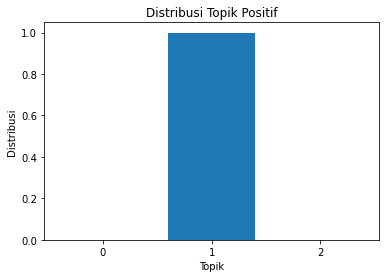

In [16]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_positif = ' '.join(positive_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_positif])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik Positif')
plt.xticks(range(num_topics))
plt.show()

Topik ke- 1
the and is to you

Topik ke- 2
youtube having help hi hone

Topik ke- 3
youtube having help hi hone



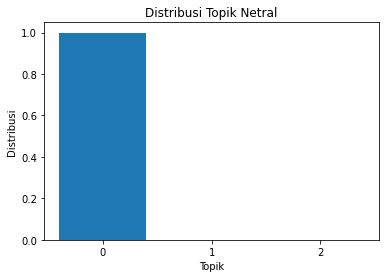

In [17]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_netral = ' '.join(neutral_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_netral])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik Netral')
plt.xticks(range(num_topics))
plt.show()

Topik ke- 1
बल ignore huuuhuhuhuhuhu hurt hungry

Topik ke- 2
to facebook and my it

Topik ke- 3
बल ignore huuuhuhuhuhuhu hurt hungry



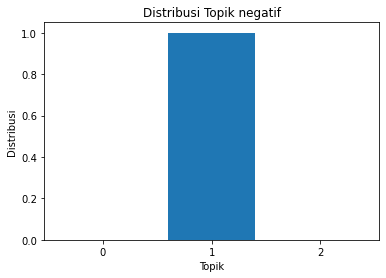

In [18]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_negatif = ' '.join(negative_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_negatif])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik negatif')
plt.xticks(range(num_topics))
plt.show()

YearMonth: 2023-05
Topik ke- 1
view videos time thank subhan

Topik ke- 2
good view videos time thank

Topik ke- 3
view videos time thank subhan



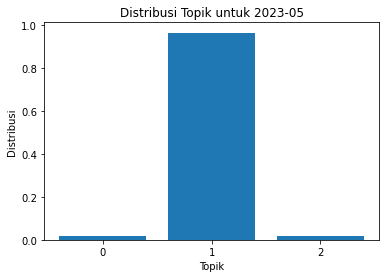

In [11]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

for index, row in df.iterrows():
    year_month = row['Month']
    text = row['Summary']

    # Membangun matriks frekuensi kata
    X = vectorizer.fit_transform([text])

    # Melatih model LDA
    num_topics = 3  # Jumlah topik yang diinginkan
    lda_model = LDA(n_components=num_topics)
    lda_model.fit(X)

    # Menampilkan kata-kata kunci untuk setiap topik
    feature_names = vectorizer.get_feature_names_out()
    print("YearMonth:", year_month)
    for topic_idx, topic in enumerate(lda_model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
        print("Topik ke-", topic_idx+1)
        print(" ".join(keywords))
        print()

    # Visualisasi distribusi topik
    topic_distribution = lda_model.transform(X)
    plt.bar(range(num_topics), topic_distribution[0], align='center')
    plt.xlabel('Topik')
    plt.ylabel('Distribusi')
    plt.title('Distribusi Topik untuk ' + year_month)
    plt.xticks(range(num_topics))
    plt.show()
    print()
    print("==============================================")

Topik ke- 1
good view videos time thank

Topik ke- 2
view videos time thank subhan

Topik ke- 3
view videos time thank subhan



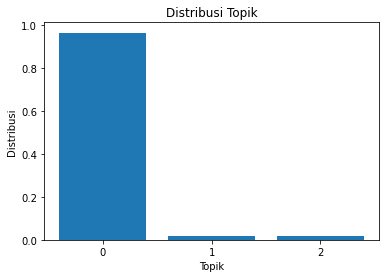

In [12]:
# Menggabungkan semua teks menjadi satu
keseluruhan_kalimat = ' '.join(df['Summary'])

X = vectorizer.fit_transform([keseluruhan_kalimat])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik')
plt.xticks(range(num_topics))
plt.show()